In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import imageio as img
import math
import time
import string
%matplotlib inline
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" #for training on gpu

In [2]:
# setting variables for the directory to the data
todata = "/home/abdullah/Desktop/Abdullah/LUMS/Senior/Sproj/ImgPreProcessing/Channel/"
val = list(string.ascii_uppercase)

# data input (img shape: 28*28)
n_input = 28

# total classes (0-9 digits)
n_classes = 26

norm = 255.0

In [3]:
# saving current directory
cur = os.getcwd()

# changing directoy to data set
os.chdir(todata)
# getting all the folder names
nmes = os.listdir(".")
nmes.sort()

# reading all the data into labels and data numpy arrays
labels = []
data = []
for letr in nmes:
    for file in os.listdir(todata+letr):
        labels.append(letr)
        f = img.imread(todata + letr + "/"+ file)
        data.append(f)
#         print(f.shape)
#         plt.imshow(f)
#         plt.show()
#         break
#     break
        # change back directory
os.chdir(cur)

print("\nData labales matrix")
labels = np.array(labels)
print(labels, labels.dtype, labels.shape)

# diving by 255 to get clamp values between zero and one
print("\nData matrix")
data = np.array(data, np.float32)/norm
print(data.dtype, data.shape)


Data labales matrix
['A' 'A' 'A' ... 'Z' 'Z' 'Z'] <U1 (3844,)

Data matrix
float32 (3844, 28, 28)


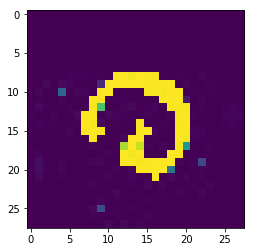

In [4]:
theImg = data[1000]
plt.imshow(theImg)
plt.show()

In [5]:
theImg.shape
theImg = theImg.reshape(-1, n_input, n_input, 1)
theImg.dtype
theImg.shape


(1, 28, 28, 1)

In [6]:
tf.reset_default_graph()
save_path = "./ModelSaver"

# loading model
with tf.Session(graph=tf.Graph()) as sess:
    tf.saved_model.loader.load(sess,  ["tag"], save_path)
    graph = tf.get_default_graph()
#     print(graph.get_operations())
    x = graph.get_tensor_by_name("x:0")
    myOut = graph.get_tensor_by_name("myOutput:0")
    print("Model Loaded")
    
    hell = sess.run(myOut, feed_dict={x:theImg})
    
    


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./ModelSaver/variables/variables
Model Loaded


In [22]:
ans = list(string.ascii_uppercase)
hell.shape
ind = np.where(hell[0] == np.amax(hell[0]))
print(ans[int(ind[0])], hell[0])

G [-0.        -1.1111112 -1.1111112 -1.1111112 -1.1111112 -1.1111112
  1.1111112 -1.1111057 -1.1111112 -1.1111112 -1.1111112 -1.1111112
 -1.1111112 -1.1111112 -1.1111112 -1.1111112 -1.1111112 -1.1111112
 -1.1111112 -1.1111112 -1.1111112 -1.1111112 -1.1111112 -0.
 -0.        -1.1111112]
